# Python Assignment 3

## Import library

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from six import StringIO
from IPython.display import Image

%matplotlib inline

## Read data

In [73]:
df = pd.read_csv('../data_set_assignment/bank-full.csv', sep=';') # sep=';' karena separator pada file csv menggunakan ';'
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Explore the data

In [74]:
df.shape

(45211, 17)

In [75]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Keterangan**
<br>
Terdapat tipe data int, yaitu:
* age
* balance
* day
* duration
* campaign
* pdays
* previous
<br>
Dan tipe data object, yaitu:
* job
* marital
* education
* default
* housing
* loan
* contact
* month
* poutcome
* y


In [77]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Keterangan**
<br>
Tidak terdapat data yang bernilai null

## Data pre-processing

### Mengganti nama kolom

In [78]:
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Keterangan**
<br>
Kolom y berhasil diubah menjadi deposit

## Standarisasi data
**Keterangan**
<br>
Lakukan standarisasi data pada tipe data integer, duration tidak diikutsertakan dalam proses standarisasi karena data yang ada pada kolom duration sangat berdampak pada hasil output nanti

In [79]:
df_standarisasi_data = df.copy()
df_standarisasi_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [80]:
scaler = StandardScaler()

data_num = [
    'age',
    'balance',
    'day',
    'campaign',
    'pdays',
    'previous'
]
df_standarisasi_data[data_num] = scaler.fit_transform(df_standarisasi_data[data_num])
df_standarisasi_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,261,-0.569351,-0.411453,-0.25194,unknown,no
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,151,-0.569351,-0.411453,-0.25194,unknown,no
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,76,-0.569351,-0.411453,-0.25194,unknown,no
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,92,-0.569351,-0.411453,-0.25194,unknown,no
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,198,-0.569351,-0.411453,-0.25194,unknown,no


**Keterangan**
<br>
.fit_transform() akan menyesuaikan instance StandardScaler ke array yang diteruskan sebagai argumen, mengubah array dan mengembalikan array standar yang baru

## Visualisasi data

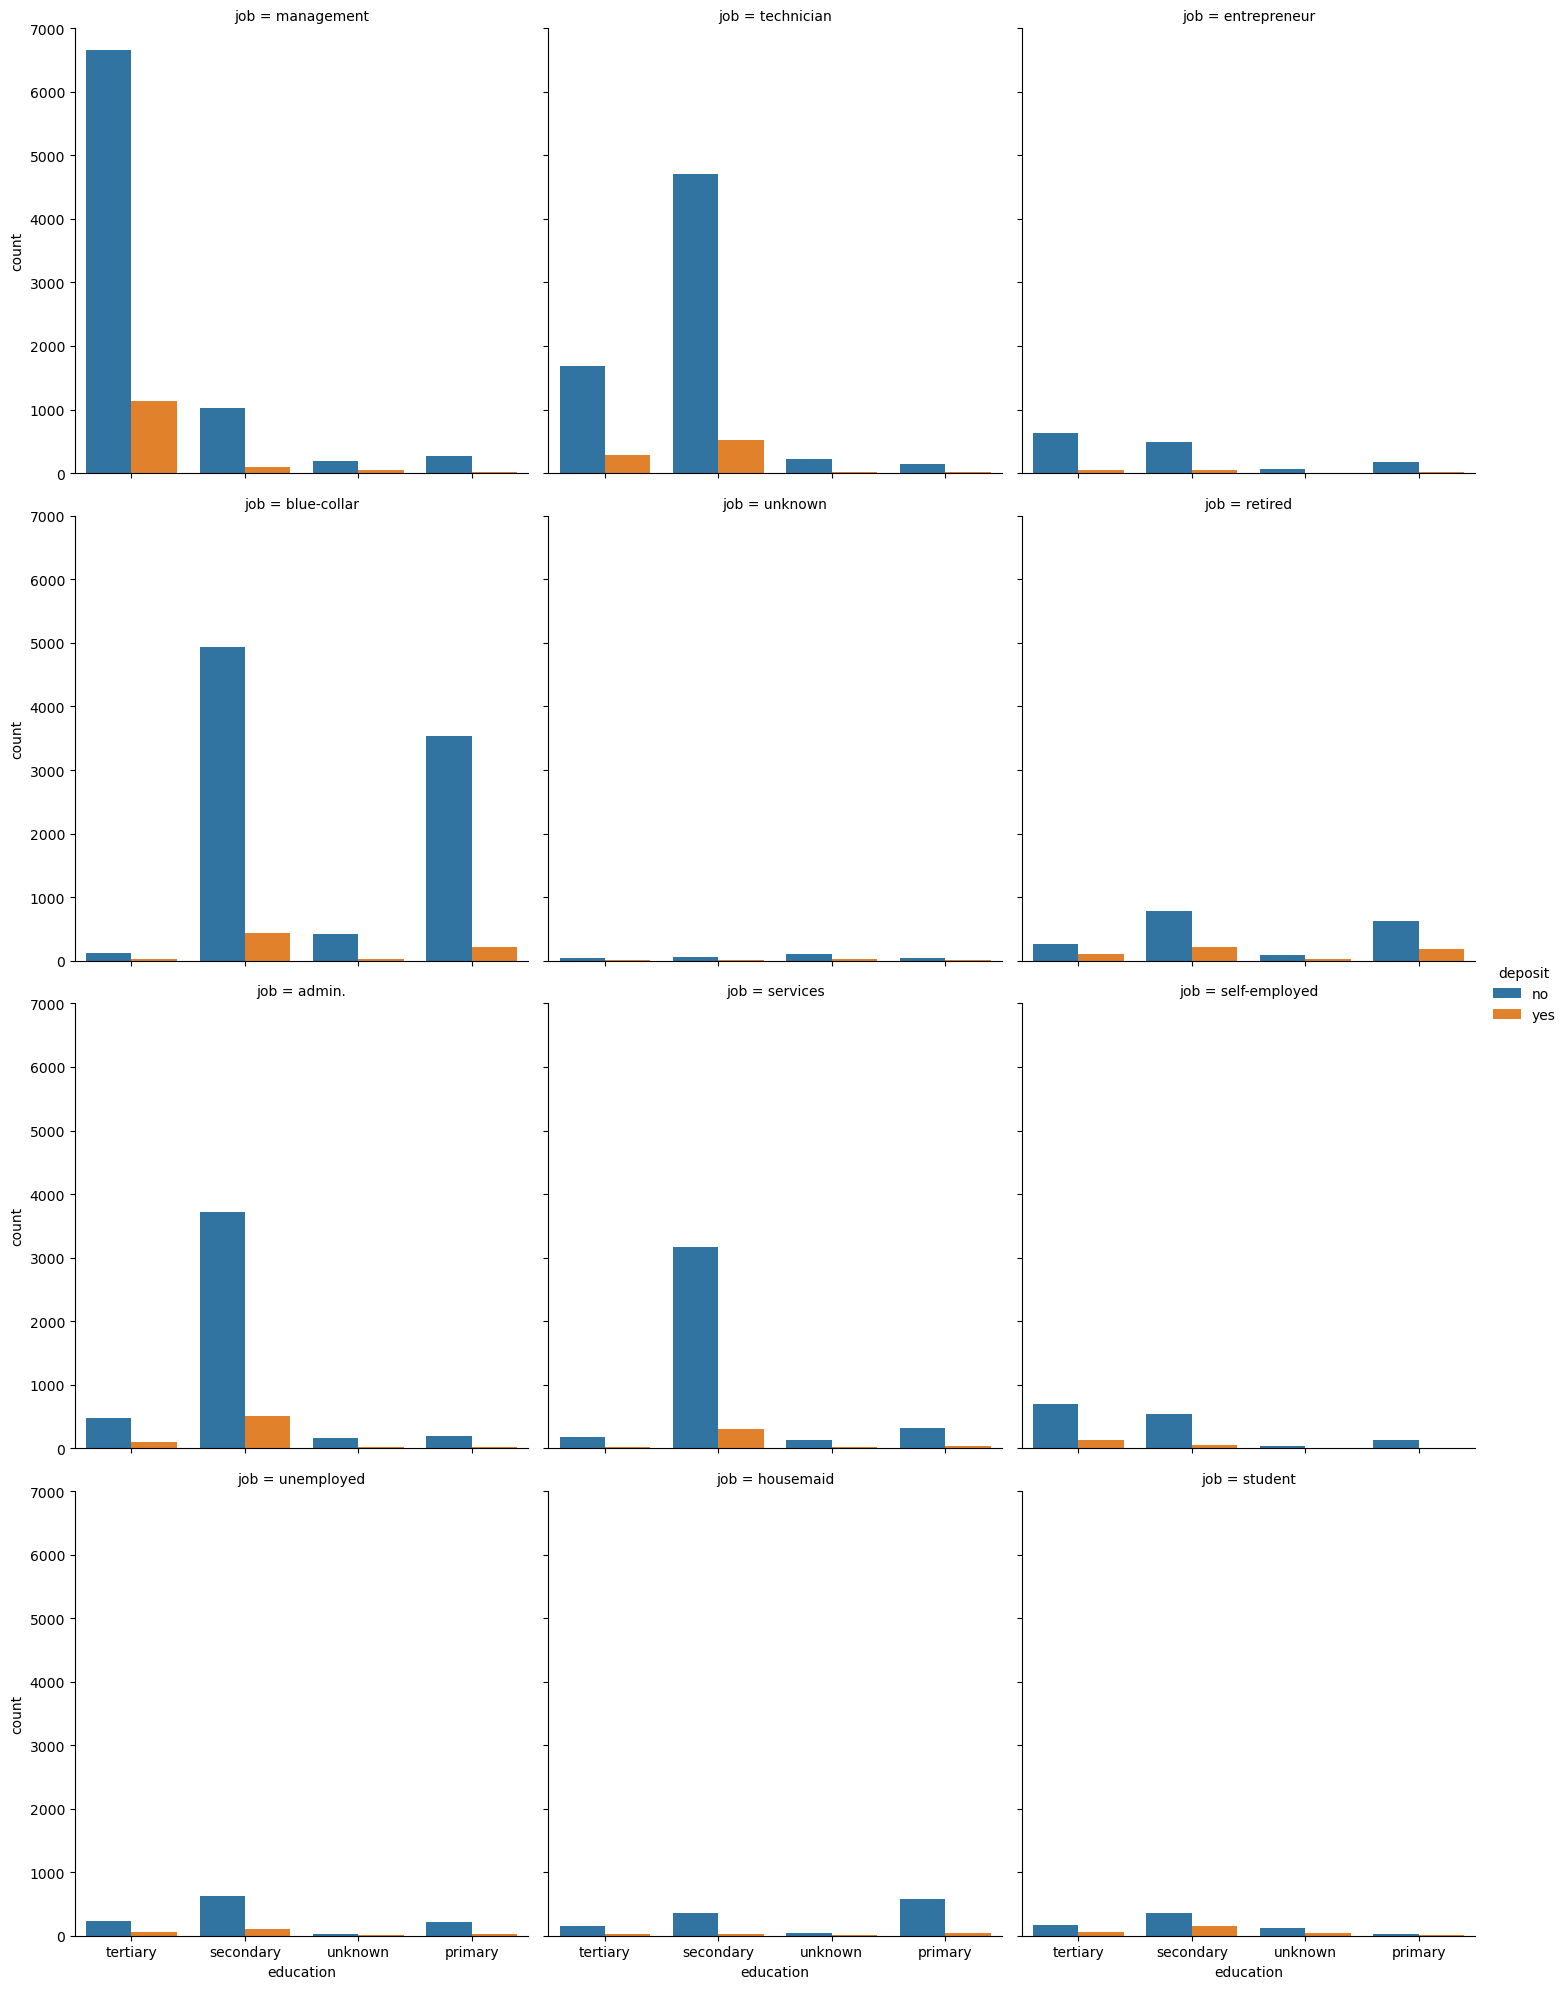

In [81]:
sns.catplot(x='education', hue='deposit', col='job', kind='count', data=df, col_wrap=3)

**Keterangan**
<br>
Dapat dilihat pada grafik di atas, Jenis job management dan jenis education tertiary banyak menunjukkan hasil tidak deposit

<AxesSubplot:>

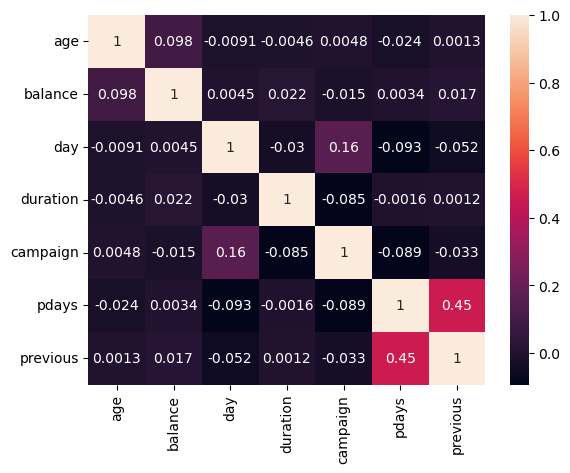

In [82]:
sns.heatmap(df_standarisasi_data.corr(), annot=True)

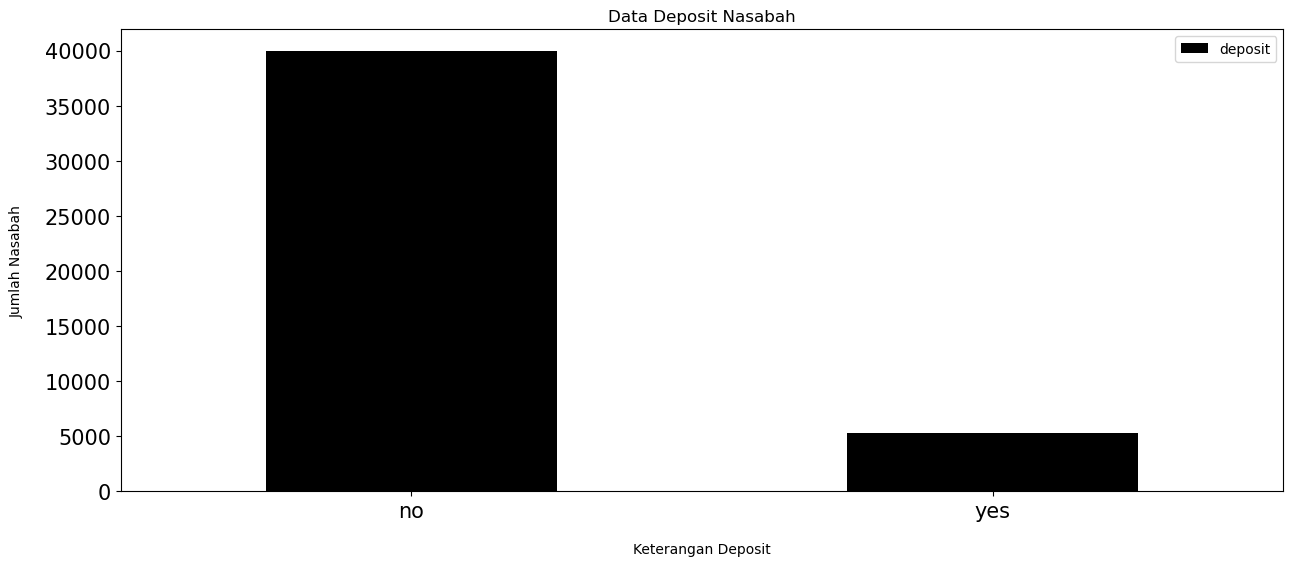

In [83]:
df['deposit'].value_counts().plot(kind='bar', figsize=(15, 6), color='black')

plt.xticks(rotation=0)
plt.tick_params(axis='both', labelsize=15)
plt.title('Data Deposit Nasabah')
plt.ylabel('Jumlah Nasabah', labelpad=15)
plt.xlabel('Keterangan Deposit', labelpad=15)

plt.legend()
plt.show()

## Classification

### Encode data using get_dummies()

In [84]:
df_enc_dum = pd.get_dummies(df_standarisasi_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
df_enc_dum.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,no,0,0,...,0,0,1,0,0,0,0,0,0,1


**Keterangan**
<br>
Selanjutnya, ubah isi data deposing dari (yes) atau (no) ke (1) atau (0) agar bisa digunakan untuk data train dan data test

In [85]:
df_enc_dum.deposit.replace(('yes', 'no'), (1, 0), inplace=True)
df_enc_dum.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Pisahkan feature dan target

#### Feature

In [86]:
df_feature = df_enc_dum.drop('deposit', axis=1)
df_feature.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,261,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,151,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,76,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,92,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,198,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#### Target

In [87]:
df_target = df_enc_dum['deposit']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: deposit, dtype: int64

### Data Training dan Data Testing

In [88]:
data = X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.3)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (31647, 51)
Shape Testing Feature: (13564, 51)
Shape Training Feature: (31647,)
Shape Testing Feature: (13564,)


### Logistic Regression

In [89]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [90]:
model.fit(df_feature, df_target)

LogisticRegression(random_state=0, solver='liblinear')

In [91]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(df_feature, df_target)

In [92]:
model.classes_

array([0, 1], dtype=int64)

In [93]:
print(model.intercept_, model.coef_)

[-0.80924445] [[ 1.24165726e-03  3.88538538e-02  8.07302232e-02  4.18817522e-03
  -2.80918750e-01 -1.42756471e-02  2.22972967e-02  8.32426111e-02
  -2.27404603e-01 -2.73539978e-01 -4.12604505e-01 -7.97434102e-02
   3.37881651e-01 -2.12948878e-01 -1.40445711e-01  4.64375905e-01
  -9.16891649e-02 -9.24676078e-02 -1.63900760e-01 -2.40045805e-01
  -4.21826300e-01 -1.47372346e-01 -4.03675308e-01 -2.24095938e-01
  -2.43912724e-02 -1.57081933e-01 -4.00964669e-01 -4.08279782e-01
  -6.76673112e-02 -7.41577140e-01 -1.91484965e-01 -6.17759486e-01
   3.22138833e-01  1.59148558e-01 -1.29053184e+00 -8.10680966e-02
  -7.73708298e-01  5.34374733e-01 -2.31314796e-01 -1.33015415e+00
  -9.08426967e-01  3.61899732e-01  1.48703485e+00 -4.82068133e-01
  -9.52312103e-01  7.86753026e-01  7.79745747e-01 -7.96347020e-01
  -5.88414758e-01  1.48213203e+00 -9.06614704e-01]]


In [94]:
model.predict_proba(df_feature)

array([[0.98505033, 0.01494967],
       [0.99019018, 0.00980982],
       [0.99701997, 0.00298003],
       ...,
       [0.02495192, 0.97504808],
       [0.88309928, 0.11690072],
       [0.87155513, 0.12844487]])

In [95]:
model.predict(df_feature)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [96]:
model.score(df_feature, df_target)

print("Hasil Model Score =", round(model.score(df_feature, df_target), 2))

Hasil Model Score = 0.9


In [97]:
confusion_matrix(df_target, model.predict(df_feature))

array([[38941,   981],
       [ 3457,  1832]], dtype=int64)

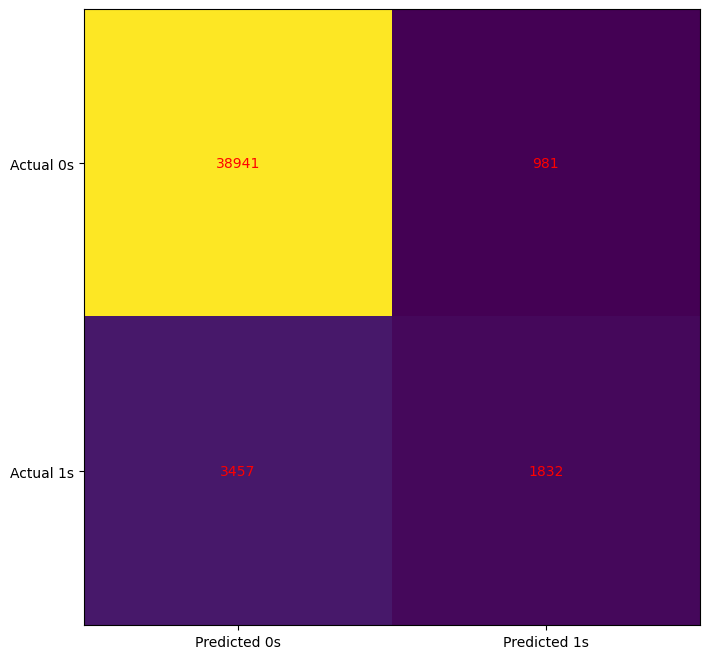

In [98]:
cm = confusion_matrix(df_target, model.predict(df_feature))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

### Decision Tree

In [99]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_cv1 = dt.predict(X_test)

In [100]:
print('Accuracy Score:', accuracy_score(y_test, pred_cv1))
matrix1 = confusion_matrix(y_test, pred_cv1)
print(matrix1)

Accuracy Score: 0.8747419640224122
[[11098   841]
 [  858   767]]


In [101]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

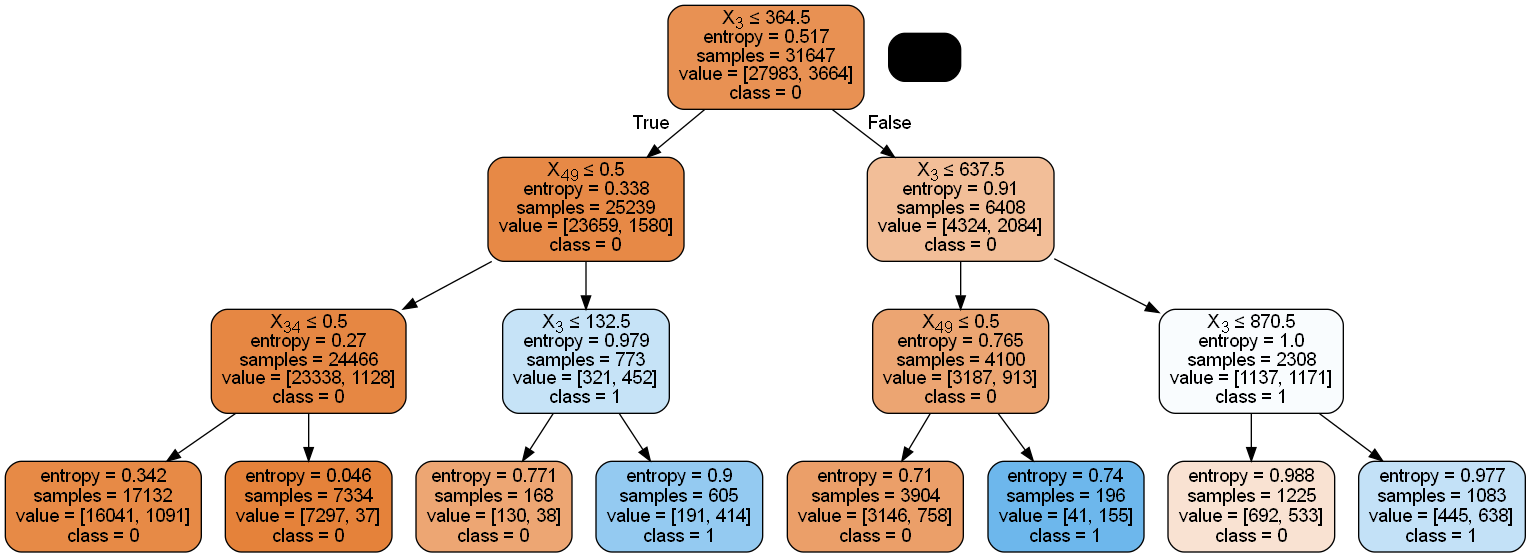

In [102]:
dot_data = StringIO()
tree.export_graphviz(
    clf,
    out_file=dot_data,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
pred_cv2 = rf.predict(X_test)

In [105]:
print('Accuracy Score:', accuracy_score(y_test, pred_cv2))
matrix2 = confusion_matrix(y_test, pred_cv2)
print(matrix2)

Accuracy Score: 0.9039368917723385
[[11641   298]
 [ 1005   620]]


### Support Vector Machine

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    df_feature,
    df_target,
    test_size=0.3,
    random_state=109
)

In [107]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

pred_cv3 = svm_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, pred_cv3))
matrix3 = confusion_matrix(y_test, pred_cv3)
print(matrix3)

Accuracy Score: 0.8869065172515482
[[11759   195]
 [ 1339   271]]


### Naive Bayes

In [108]:
nb = GaussianNB()
nb.fit(X_train, y_train)

pred_cv4 = nb.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, pred_cv4))
matrix4 = confusion_matrix(y_test, pred_cv4)
print(matrix4)

Accuracy Score: 0.851150103214391
[[10705  1249]
 [  770   840]]


### K-Nearest Neighbor

In [109]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred_cv5 = knn.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, pred_cv5))
matrix5 = confusion_matrix(y_test, pred_cv5)
print(matrix5)

c:\Users\qaris\anaconda3\envs\dslearning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score: 0.8823355942199941
[[11543   411]
 [ 1185   425]]


In [110]:
print("Logistic Regression:", round(accuracy_score(y_test, pred_cv), 3))
print("Decision Tree:", round(accuracy_score(y_test, pred_cv1), 3))
print("Random Forest:", round(accuracy_score(y_test, pred_cv2), 3))
print("SVM:", round(accuracy_score(y_test, pred_cv3), 3))
print("Naive Bayes:", round(accuracy_score(y_test, pred_cv4), 3))
print("KNN:", round(accuracy_score(y_test, pred_cv5), 3))

Logistic Regression: 0.84
Decision Tree: 0.79
Random Forest: 0.826
SVM: 0.887
Naive Bayes: 0.851
KNN: 0.882
